# Applied Data Science - Capstone Project

<h3>Welcome!</h3>

This notebook will be used for the Applied Data Science Capstone Project on Coursera

### Importing libraries and data

In [125]:
import numpy as np
import types
import pandas as pd

! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [126]:
# The code was removed by Watson Studio for sharing.

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,...,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
0,2010,Zona urbana,25/01/2010,SE,999999.0,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,999.0,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,7087.0,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,07/05/2010,SE,999999.0,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div


 <h3>Data Analysis</h3> 

In [127]:
print(df_data_1.dtypes)

Any                            int64
zona                          object
dat                           object
via                           object
pk                           float64
nomMun                        object
nomCom                        object
nomDem                        object
F_MORTS                        int64
F_FERITS_GREUS                 int64
F_FERITS_LLEUS                 int64
F_VICTIMES                     int64
F_UNITATS_IMPLICADES           int64
F_VIANANTS_IMPLICADES          int64
F_BICICLETES_IMPLICADES        int64
F_CICLOMOTORS_IMPLICADES       int64
F_MOTOCICLETES_IMPLICADES      int64
F_VEH_LLEUGERS_IMPLICADES      int64
F_VEH_PESANTS_IMPLICADES       int64
F_ALTRES_UNIT_IMPLICADES       int64
F_UNIT_DESC_IMPLICADES         int64
C_VELOCITAT_VIA              float64
D_ACC_AMB_FUGA                object
D_BOIRA                       object
D_CARACT_ENTORN               object
D_CARRIL_ESPECIAL             object
D_CIRCULACIO_MESURES_ESP      object
D

In [128]:
df_data_1.shape

(16774, 58)

In [129]:
#Create target variable Y (it's 1 if there are any number of fatalities, 0 if none)
Y = (df_data_1['F_MORTS'] > 0).astype(int)
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: F_MORTS, dtype: int64

 <h3>Data Visualization</h3> 

In [130]:
temp_df = df_data_1.groupby(['Any']).sum()
sum_any_df = temp_df[['F_MORTS', 'F_FERITS_GREUS', 'F_FERITS_LLEUS']].copy()
sum_any_df.head()

,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS
Any,,,
2010,339,2007,883
2011,280,1866,757
2012,274,1980,879
2013,232,1901,752
2014,230,1888,760


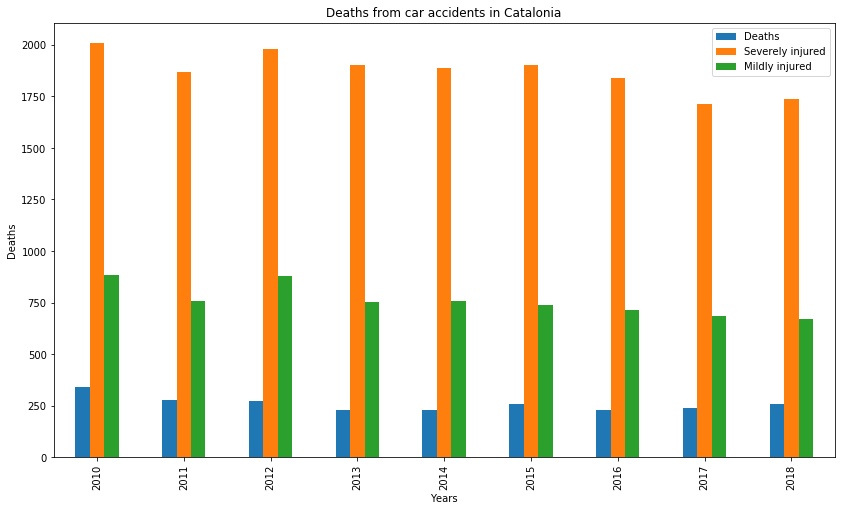

In [131]:
sum_any_df.index = sum_any_df.index.map(int)
sum_any_df.plot(kind='bar', figsize=(14, 8))

plt.title('Deaths from car accidents in Catalonia')
plt.ylabel('Deaths')
plt.xlabel('Years')
plt.legend(labels=['Deaths', 'Severely injured', 'Mildly injured'], loc='upper right') 

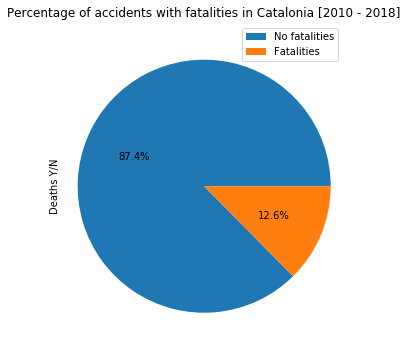

In [132]:
new_df = Y.value_counts().rename('Deaths Y/N') 
new_df.plot(kind='pie',
            figsize=(5, 6),
            autopct='%1.1f%%', # add in percentages
            labels=None,  
            title=None,
            )

plt.title('Percentage of accidents with fatalities in Catalonia [2010 - 2018]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=['No fatalities', 'Fatalities'], loc='upper right') 
plt.show()

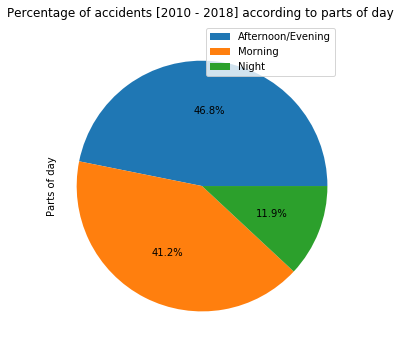

In [133]:
new_df = df_data_1['grupHor'].value_counts().rename('Parts of day') 

new_df.plot(kind='pie',
            figsize=(5, 6),
            autopct='%1.1f%%', # add in percentages
            labels=None,  
            title=None,
            )

plt.title('Percentage of accidents [2010 - 2018] according to parts of day')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=['Afternoon/Evening', 'Morning', 'Night'], loc='upper right') 
plt.show()

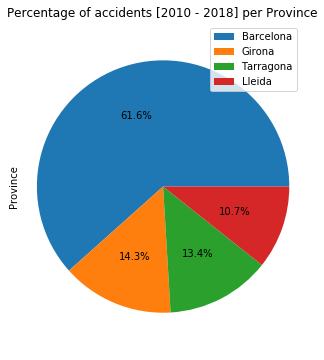

In [134]:
new_df = df_data_1['nomDem'].value_counts().rename('Province') 

new_df.plot(kind='pie',
            figsize=(5, 6),
            autopct='%1.1f%%', # add in percentages
            labels=None,  
            title=None,
            )

plt.title('Percentage of accidents [2010 - 2018] per Province')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=['Barcelona', 'Girona', 'Tarragona', 'Lleida'], loc='upper right') 
plt.show()

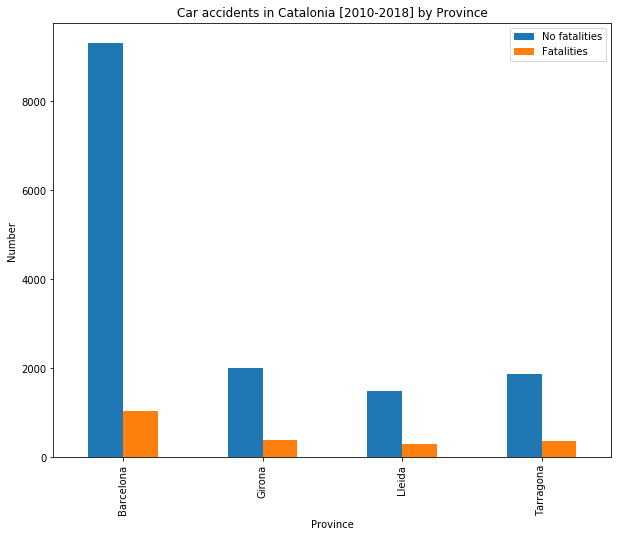

In [135]:
table = pd.crosstab(df_data_1['nomDem'],Y, margins=False)

table.plot(kind='bar', figsize=(10, 8))

plt.title('Car accidents in Catalonia [2010-2018] by Province')
plt.ylabel('Number')
plt.xlabel('Province')
plt.legend(labels=['No fatalities', 'Fatalities'], loc='upper right') 

## Checking chi squared correlation between output and features

In [136]:
df_data_1['F_VEH_PESANTS_IMPLICADES'].value_counts(dropna=False)

0    14850
1     1740
2      159
3       16
4        7
6        1
5        1
Name: F_VEH_PESANTS_IMPLICADES, dtype: int64

In [137]:
#Contingency Table
#With this cell we can check pairs of variables, typically Y and another, to find the contingency table, used in
# the following cell to check if there is dependency or not. This helps us in selecting the features to be included in the model!!

table = pd.crosstab(df_data_1['D_CLIMATOLOGIA'],Y, margins=False)
print(table)

F_MORTS                0     1
D_CLIMATOLOGIA                
Bon temps          13822  1962
Calamarsa              9     0
Nevant                 7     1
Pluja dèbil          626   120
Pluja forta          192    31
Sense especificar      4     0


In [138]:
from scipy import stats

stat, p, dof, expected = stats.chi2_contingency(table.values)

# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=11.070, stat=10.859
Independent (fail to reject H0)
significance=0.050, p=0.054
Independent (fail to reject H0)


## Selecting independent variables for the model

In [139]:
cat_df=df_data_1[['tipDia','grupHor','nomDem','zona','D_TIPUS_VIA','D_SENTITS_VIA','D_INTER_SECCIO','D_LLUMINOSITAT', 'D_CARACT_ENTORN','C_VELOCITAT_VIA', 'F_VEH_PESANTS_IMPLICADES']]

In [140]:
cat_df.shape

(16774, 11)

Once the variables are selected, we will convert them into categorical variables (ordinal), or boolean with "get_dummies". 

In [141]:
print(cat_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 11 columns):
tipDia                      16774 non-null object
grupHor                     16774 non-null object
nomDem                      16774 non-null object
zona                        16774 non-null object
D_TIPUS_VIA                 16774 non-null object
D_SENTITS_VIA               14248 non-null object
D_INTER_SECCIO              16774 non-null object
D_LLUMINOSITAT              16774 non-null object
D_CARACT_ENTORN             16746 non-null object
C_VELOCITAT_VIA             14654 non-null float64
F_VEH_PESANTS_IMPLICADES    16774 non-null int64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB
None


In [142]:
df_data_1['D_CARACT_ENTORN'].value_counts(dropna=False)

A nivell             6733
Sense Especificar    5971
Mixt                 2126
Desmunt              1223
Terraplé              693
NaN                    28
Name: D_CARACT_ENTORN, dtype: int64

In [143]:
print(cat_df.isnull().sum())

tipDia                         0
grupHor                        0
nomDem                         0
zona                           0
D_TIPUS_VIA                    0
D_SENTITS_VIA               2526
D_INTER_SECCIO                 0
D_LLUMINOSITAT                 0
D_CARACT_ENTORN               28
C_VELOCITAT_VIA             2120
F_VEH_PESANTS_IMPLICADES       0
dtype: int64


In [144]:
# Replace NaN with the appropriate value for each column
cat_df['D_SENTITS_VIA']= cat_df['D_SENTITS_VIA'].fillna(cat_df['D_SENTITS_VIA'].value_counts().index[2])
cat_df['C_VELOCITAT_VIA']= cat_df['C_VELOCITAT_VIA'].fillna(cat_df['C_VELOCITAT_VIA'].value_counts().index[0])
cat_df['D_CARACT_ENTORN']= cat_df['D_CARACT_ENTORN'].fillna(cat_df['D_CARACT_ENTORN'].value_counts().index[1])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [145]:
# checking it worked...
cat_df['D_CARACT_ENTORN'].value_counts(dropna=False)

A nivell             6733
Sense Especificar    5999
Mixt                 2126
Desmunt              1223
Terraplé              693
Name: D_CARACT_ENTORN, dtype: int64

In [146]:
print(cat_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 11 columns):
tipDia                      16774 non-null object
grupHor                     16774 non-null object
nomDem                      16774 non-null object
zona                        16774 non-null object
D_TIPUS_VIA                 16774 non-null object
D_SENTITS_VIA               16774 non-null object
D_INTER_SECCIO              16774 non-null object
D_LLUMINOSITAT              16774 non-null object
D_CARACT_ENTORN             16774 non-null object
C_VELOCITAT_VIA             16774 non-null float64
F_VEH_PESANTS_IMPLICADES    16774 non-null int64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB
None


In [147]:
cat_df_replace = cat_df.copy()

In [148]:
cat_df_replace['D_TIPUS_VIA'].value_counts()

Via urbana( inclou carrer i carrer residencial)    8465
Carretera convencional                             6987
Altres                                              498
Autovia                                             462
Autopista                                           221
Camí rural/pista forestal                           141
Name: D_TIPUS_VIA, dtype: int64

In [149]:
replace_map = {'D_TIPUS_VIA': {'Via urbana( inclou carrer i carrer residencial)': 1, 'Carretera convencional': 2, 'Altres': 3, 
                               'Autovia': 4, 'Autopista': 5, 'Camí rural/pista forestal': 6}}

In [150]:
print(replace_map)

{'D_TIPUS_VIA': {'Via urbana( inclou carrer i carrer residencial)': 1, 'Carretera convencional': 2, 'Altres': 3, 'Autovia': 4, 'Autopista': 5, 'Camí rural/pista forestal': 6}}


In [151]:
cat_df_replace.replace(replace_map, inplace=True)

In [152]:
cat_df_replace['D_TIPUS_VIA'].value_counts()

1    8465
2    6987
3     498
4     462
5     221
6     141
Name: D_TIPUS_VIA, dtype: int64

In [153]:
print(cat_df_replace.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 11 columns):
tipDia                      16774 non-null object
grupHor                     16774 non-null object
nomDem                      16774 non-null object
zona                        16774 non-null object
D_TIPUS_VIA                 16774 non-null int64
D_SENTITS_VIA               16774 non-null object
D_INTER_SECCIO              16774 non-null object
D_LLUMINOSITAT              16774 non-null object
D_CARACT_ENTORN             16774 non-null object
C_VELOCITAT_VIA             16774 non-null float64
F_VEH_PESANTS_IMPLICADES    16774 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB
None


In [154]:
cat_df_replace['D_SENTITS_VIA'].value_counts()

Doble sentit         10261
Un sol sentit         3590
Sense especificar     2923
Name: D_SENTITS_VIA, dtype: int64

In [155]:
replace_map = {'D_SENTITS_VIA': {'Sense especificar': 1, 'Un sol sentit': 2, 'Doble sentit': 3}}

In [156]:
print(replace_map)

{'D_SENTITS_VIA': {'Sense especificar': 1, 'Un sol sentit': 2, 'Doble sentit': 3}}


In [157]:
cat_df_replace.replace(replace_map, inplace=True)
cat_df_replace.head()

,tipDia,grupHor,nomDem,zona,D_TIPUS_VIA,D_SENTITS_VIA,D_INTER_SECCIO,D_LLUMINOSITAT,D_CARACT_ENTORN,C_VELOCITAT_VIA,F_VEH_PESANTS_IMPLICADES
0,dill-dij,Nit,Barcelona,Zona urbana,1,2,Arribant o eixint intersecció fins 50m,"De nit, il·luminació artificial suficient",Desmunt,100.0,0
1,dg,Nit,Lleida,Carretera,2,3,Dintre intersecció,"De nit, il·luminació artificial suficient",A nivell,40.0,0
2,dill-dij,Tarda,Girona,Carretera,2,3,En secció,"De dia, dia clar",A nivell,80.0,2
3,dis,Nit,Barcelona,Zona urbana,1,2,Dintre intersecció,"De nit, il·luminació artificial suficient",Sense Especificar,100.0,0
4,div,Tarda,Barcelona,Zona urbana,1,2,Dintre intersecció,"De dia, dia clar",Sense Especificar,100.0,0


In [158]:
cat_df_replace['D_SENTITS_VIA'].value_counts()

3    10261
2     3590
1     2923
Name: D_SENTITS_VIA, dtype: int64

In [159]:
print(cat_df_replace.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 11 columns):
tipDia                      16774 non-null object
grupHor                     16774 non-null object
nomDem                      16774 non-null object
zona                        16774 non-null object
D_TIPUS_VIA                 16774 non-null int64
D_SENTITS_VIA               16774 non-null int64
D_INTER_SECCIO              16774 non-null object
D_LLUMINOSITAT              16774 non-null object
D_CARACT_ENTORN             16774 non-null object
C_VELOCITAT_VIA             16774 non-null float64
F_VEH_PESANTS_IMPLICADES    16774 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB
None


In [160]:
cat_df_replace['D_INTER_SECCIO'].value_counts()

En secció                                 11141
Dintre intersecció                         4737
Arribant o eixint intersecció fins 50m      896
Name: D_INTER_SECCIO, dtype: int64

In [161]:
replace_map = {'D_INTER_SECCIO': {'En secció': 1, 'Dintre intersecció': 2, 'Arribant o eixint intersecció fins 50m': 3}}
print(replace_map)

{'D_INTER_SECCIO': {'En secció': 1, 'Dintre intersecció': 2, 'Arribant o eixint intersecció fins 50m': 3}}


In [162]:
cat_df_replace.replace(replace_map, inplace=True)
cat_df_replace.head()

,tipDia,grupHor,nomDem,zona,D_TIPUS_VIA,D_SENTITS_VIA,D_INTER_SECCIO,D_LLUMINOSITAT,D_CARACT_ENTORN,C_VELOCITAT_VIA,F_VEH_PESANTS_IMPLICADES
0,dill-dij,Nit,Barcelona,Zona urbana,1,2,3,"De nit, il·luminació artificial suficient",Desmunt,100.0,0
1,dg,Nit,Lleida,Carretera,2,3,2,"De nit, il·luminació artificial suficient",A nivell,40.0,0
2,dill-dij,Tarda,Girona,Carretera,2,3,1,"De dia, dia clar",A nivell,80.0,2
3,dis,Nit,Barcelona,Zona urbana,1,2,2,"De nit, il·luminació artificial suficient",Sense Especificar,100.0,0
4,div,Tarda,Barcelona,Zona urbana,1,2,2,"De dia, dia clar",Sense Especificar,100.0,0


In [163]:
print(cat_df_replace.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 11 columns):
tipDia                      16774 non-null object
grupHor                     16774 non-null object
nomDem                      16774 non-null object
zona                        16774 non-null object
D_TIPUS_VIA                 16774 non-null int64
D_SENTITS_VIA               16774 non-null int64
D_INTER_SECCIO              16774 non-null int64
D_LLUMINOSITAT              16774 non-null object
D_CARACT_ENTORN             16774 non-null object
C_VELOCITAT_VIA             16774 non-null float64
F_VEH_PESANTS_IMPLICADES    16774 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.4+ MB
None


In [164]:
cat_df_replace['D_LLUMINOSITAT'].value_counts()

De dia, dia clar                               11509
De nit, il·luminació artificial suficient       2021
De nit, sense llum artificial                   1176
Alba o capvespre                                 804
De dia, dia fosc                                 700
De nit, il·luminació artificial insuficient      558
Sense especificar                                  6
Name: D_LLUMINOSITAT, dtype: int64

In [165]:
replace_map = {'D_LLUMINOSITAT': {'De dia, dia clar': 1, 'De nit, il·luminació artificial suficient': 2, 'De nit, sense llum artificial': 3, 
                                 'Alba o capvespre': 4, 'De dia, dia fosc': 5, 'De nit, il·luminació artificial insuficient': 6, 'Sense especificar': 7 }}
print(replace_map)

{'D_LLUMINOSITAT': {'De dia, dia clar': 1, 'De nit, il·luminació artificial suficient': 2, 'De nit, sense llum artificial': 3, 'Alba o capvespre': 4, 'De dia, dia fosc': 5, 'De nit, il·luminació artificial insuficient': 6, 'Sense especificar': 7}}


In [166]:
cat_df_replace.replace(replace_map, inplace=True)
cat_df_replace.head()

,tipDia,grupHor,nomDem,zona,D_TIPUS_VIA,D_SENTITS_VIA,D_INTER_SECCIO,D_LLUMINOSITAT,D_CARACT_ENTORN,C_VELOCITAT_VIA,F_VEH_PESANTS_IMPLICADES
0,dill-dij,Nit,Barcelona,Zona urbana,1,2,3,2,Desmunt,100.0,0
1,dg,Nit,Lleida,Carretera,2,3,2,2,A nivell,40.0,0
2,dill-dij,Tarda,Girona,Carretera,2,3,1,1,A nivell,80.0,2
3,dis,Nit,Barcelona,Zona urbana,1,2,2,2,Sense Especificar,100.0,0
4,div,Tarda,Barcelona,Zona urbana,1,2,2,1,Sense Especificar,100.0,0


In [167]:
print(cat_df_replace.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 11 columns):
tipDia                      16774 non-null object
grupHor                     16774 non-null object
nomDem                      16774 non-null object
zona                        16774 non-null object
D_TIPUS_VIA                 16774 non-null int64
D_SENTITS_VIA               16774 non-null int64
D_INTER_SECCIO              16774 non-null int64
D_LLUMINOSITAT              16774 non-null int64
D_CARACT_ENTORN             16774 non-null object
C_VELOCITAT_VIA             16774 non-null float64
F_VEH_PESANTS_IMPLICADES    16774 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.4+ MB
None


In [168]:
# Now that we have the ordinal variables, we encode these others with one-shot encoding (get-dummies)

cat_df_onehot = cat_df_replace.copy()
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['tipDia'], prefix = ['tipDia'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['grupHor'], prefix = ['grupHor'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['nomDem'], prefix = ['nomDem'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['zona'], prefix = ['zona'])
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['D_CARACT_ENTORN'], prefix = ['entorn'])
print(cat_df_onehot.head())

   D_TIPUS_VIA  D_SENTITS_VIA  D_INTER_SECCIO  D_LLUMINOSITAT  \
0            1              2               3               2   
1            2              3               2               2   
2            2              3               1               1   
3            1              2               2               2   
4            1              2               2               1   

   C_VELOCITAT_VIA  F_VEH_PESANTS_IMPLICADES  tipDia_dg  tipDia_dill-dij  \
0            100.0                         0          0                1   
1             40.0                         0          1                0   
2             80.0                         2          0                1   
3            100.0                         0          0                0   
4            100.0                         0          0                0   

   tipDia_dis  tipDia_div  ...  nomDem_Girona  nomDem_Lleida  \
0           0           0  ...              0              0   
1           0           

In [169]:
print(cat_df_onehot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 24 columns):
D_TIPUS_VIA                 16774 non-null int64
D_SENTITS_VIA               16774 non-null int64
D_INTER_SECCIO              16774 non-null int64
D_LLUMINOSITAT              16774 non-null int64
C_VELOCITAT_VIA             16774 non-null float64
F_VEH_PESANTS_IMPLICADES    16774 non-null int64
tipDia_dg                   16774 non-null uint8
tipDia_dill-dij             16774 non-null uint8
tipDia_dis                  16774 non-null uint8
tipDia_div                  16774 non-null uint8
grupHor_Matí                16774 non-null uint8
grupHor_Nit                 16774 non-null uint8
grupHor_Tarda               16774 non-null uint8
nomDem_Barcelona            16774 non-null uint8
nomDem_Girona               16774 non-null uint8
nomDem_Lleida               16774 non-null uint8
nomDem_Tarragona            16774 non-null uint8
zona_Carretera              16774 non-null uint8
zona_Zo

_______________________________


### Model selection and training

In [170]:
y = np.asarray(Y)
y[0:5]

array([0, 0, 1, 0, 0])

In [171]:
X = np.asarray(cat_df_onehot)
X[0:5]

array([[  1.,   2.,   3.,   2., 100.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.],
       [  2.,   3.,   2.,   2.,  40.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.],
       [  2.,   3.,   1.,   1.,  80.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.],
       [  1.,   2.,   2.,   2., 100.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.],
       [  1.,   2.,   2.,   1., 100.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.]])

Data Standardization give data zero mean and unit variance, it is good practice:

In [172]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14257, 24) (14257,)
Test set: (2517, 24) (2517,)


In [174]:
## To balance the classes in terms of appearance

unique_elements, we = np.unique(y_train, return_counts=True)
ratio_we=we[1]/we[0]
weights = {0:ratio_we, 1:1.0}
print(weights)

{0: 0.1404687624990001, 1: 1.0}


Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(solver='lbfgs', class_weight=weights).fit(X_train,y_train)
LR

LogisticRegression(C=1.0, class_weight={0: 0.1404687624990001, 1: 1.0},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [176]:
yhat = LR.predict(X_test)
print(yhat[0:10])
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob[0:10])
print(y_test[0:10])

[0 1 1 0 0 0 0 0 0 1]
[[0.6  0.4 ]
 [0.49 0.51]
 [0.39 0.61]
 [0.65 0.35]
 [0.67 0.33]
 [0.58 0.42]
 [0.69 0.31]
 [0.71 0.29]
 [0.74 0.26]
 [0.37 0.63]]
[0 0 0 0 0 0 0 0 0 1]


### confusion matrix
A main way of looking at accuracy of classifier is to look at __confusion matrix__.

In [177]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 260   98]
 [ 780 1379]]


Normalized confusion matrix
[[0.73 0.27]
 [0.36 0.64]]


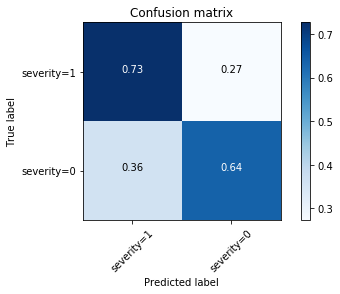

In [178]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=0'],normalize= True,  title='Confusion matrix')

0.7035434943365768

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [180]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6511720301946762

In [181]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      2159
           1       0.25      0.73      0.37       358

   micro avg       0.65      0.65      0.65      2517
   macro avg       0.59      0.68      0.57      2517
weighted avg       0.84      0.65      0.70      2517



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.


We can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.70 in our case.

In [184]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7035434943365768

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of fatality is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [182]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6214102515231142

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.731


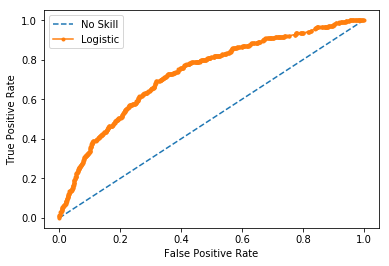

In [183]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# keep probabilities for the positive outcome only
yhat_prob_ = yhat_prob[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, yhat_prob_)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, yhat_prob_)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

<h3>Thanks for reviewing my notebook!</h3>

<h4>Author:  Marc Bara</h4>

<p>Copyright &copy; 2020.</p>